<a href="https://colab.research.google.com/github/hayatk190/Mohammed_Hayat_INFO5731_spring2025.ipynb/blob/main/Mohammed_Hayat_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

Question 1
(1)

Saving Tweets.csv.zip to Tweets.csv (1).zip
Original Dataset Shape: (14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN   

<ipython-input-1-ff409a4a6eed>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='Set2')


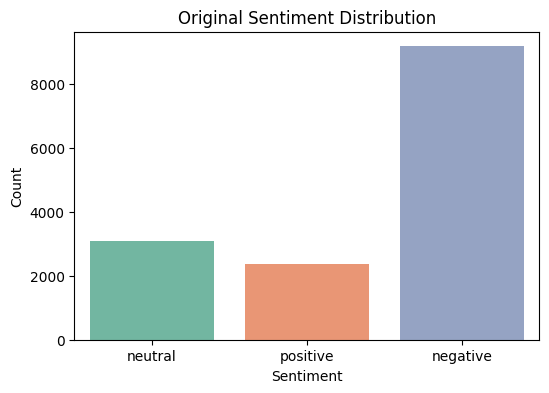


Balanced Sentiment Class Distribution:
airline_sentiment
negative    2363
neutral     2363
positive    2363
Name: count, dtype: int64


<ipython-input-1-ff409a4a6eed>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df_balanced, palette='Set1')


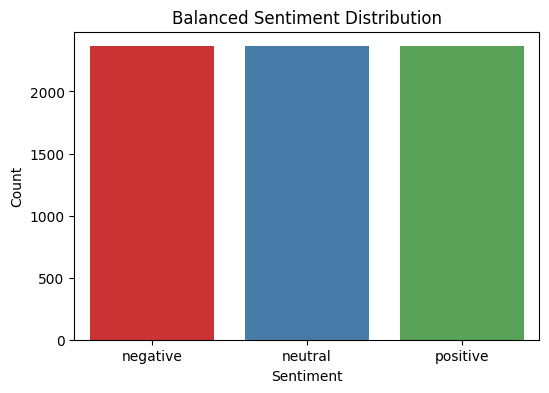

In [ ]:
# Q1: Dataset Collection & Preparation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from google.colab import files
import zipfile

# Upload and unzip dataset
uploaded = files.upload()  # Upload 'Tweets.csv.zip' here

with zipfile.ZipFile('Tweets.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load dataset
df = pd.read_csv('Tweets.csv')

# Display dataset shape and preview
print("Original Dataset Shape:", df.shape)
print(df.head())

# Check sentiment class distribution
print("\nOriginal Sentiment Class Distribution:")
print(df['airline_sentiment'].value_counts())

# Visualize original distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='airline_sentiment', data=df, palette='Set2')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Balance the dataset (downsample to smallest class)
positive = df[df['airline_sentiment'] == 'positive']
neutral = df[df['airline_sentiment'] == 'neutral']
negative = df[df['airline_sentiment'] == 'negative']

min_len = min(len(positive), len(neutral), len(negative))

positive_down = resample(positive, replace=False, n_samples=min_len, random_state=42)
neutral_down = resample(neutral, replace=False, n_samples=min_len, random_state=42)
negative_down = resample(negative, replace=False, n_samples=min_len, random_state=42)

# Combine and shuffle
df_balanced = pd.concat([positive_down, neutral_down, negative_down])
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

# Confirm balanced distribution
print("\nBalanced Sentiment Class Distribution:")
print(df_balanced['airline_sentiment'].value_counts())

# Visualize balanced distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='airline_sentiment', data=df_balanced, palette='Set1')
plt.title('Balanced Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Question 1
(2)

In [ ]:
# Q2: Text Preprocessing

import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the balanced dataset
df = pd.read_csv('Twitter_Airline_Balanced.csv')

# Text cleaning function
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)             # remove URLs
    text = re.sub(r"@\w+", "", text)                # remove mentions
    text = re.sub(r"#\w+", "", text)                # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)             # remove punctuation
    text = re.sub(r"\d+", "", text)                 # remove numbers
    text = text.lower()                             # convert to lowercase
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Show a preview of cleaned text
print("Sample cleaned text:")
print(df[['text', 'clean_text']].head())

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text'])

# Target labels
y = df['airline_sentiment']

# Print TF-IDF output shape
print("\nTF-IDF matrix shape:", X.shape)
print("Target label shape:", y.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample cleaned text:
                                                text  \
0  @AmericanAir I understand you are busy but I h...   
1  @JetBlue thank you for getting me home. And de...   
2  @AmericanAir you guys are killing me. http://t...   
3  @JetBlue traveling w/ a rifle for a hunting tr...   
4  @SouthwestAir Awesome staff at the  check in d...   

                                          clean_text  
0  understand busy still gotten answer need get h...  
1  thank getting home despite odds reunited delin...  
2                                       guys killing  
3  traveling w rifle hunting trip pistol large ri...  
4  awesome staff check desk paper airplane race s...  

TF-IDF matrix shape: (7089, 3000)
Target label shape: (7089,)


Question 1
(3)

Logistic Regression Results:
Accuracy: 0.7179125528913963

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.68      0.71       461
     neutral       0.64      0.72      0.68       469
    positive       0.78      0.75      0.76       488

    accuracy                           0.72      1418
   macro avg       0.72      0.72      0.72      1418
weighted avg       0.72      0.72      0.72      1418



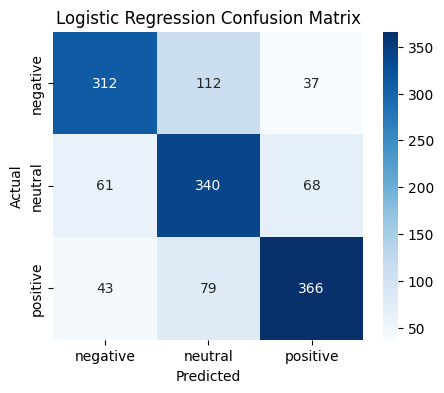

Naive Bayes Results:
Accuracy: 0.7221438645980254

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.75      0.73       461
     neutral       0.70      0.62      0.66       469
    positive       0.75      0.79      0.77       488

    accuracy                           0.72      1418
   macro avg       0.72      0.72      0.72      1418
weighted avg       0.72      0.72      0.72      1418



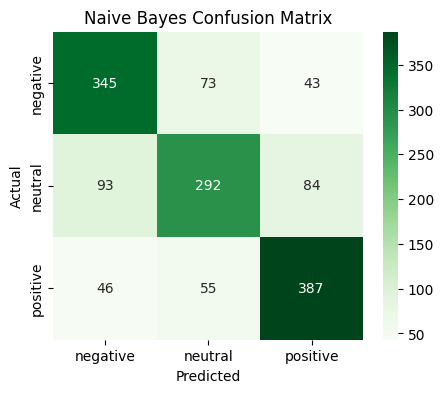

In [ ]:
# Q3: Model Building & Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Logistic Regression Model
# =========================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation - Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix for LR
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===========================
# Multinomial Naive Bayes Model
# ===========================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation - Naive Bayes
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix for NB
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Question 1
(4)

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


Question 2
(1)

📊 Train Data Sample:
                                 review  label
0  I loved this movie, it was amazing!      1
1   Terrible acting and a boring plot.      0
2    Great visuals and stunning story.      1
3    It was okay, not the best though.      1
4           Worst film I’ve ever seen.      0

Label Distribution (Train):
 label
1    6
0    4
Name: count, dtype: int64


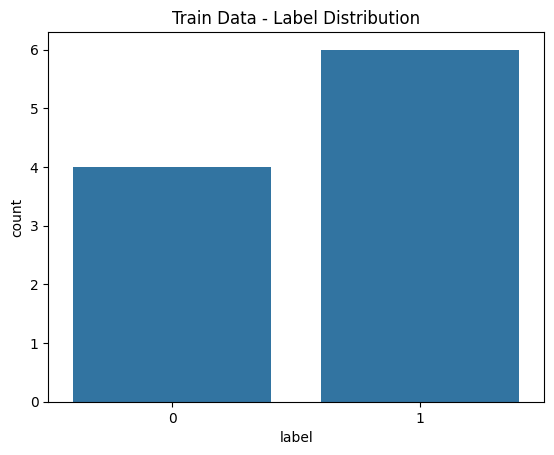


📈 Cross-Validation Accuracy Scores (4-Fold):
Logistic Regression: Mean Accuracy = 0.3750
Naive Bayes: Mean Accuracy = 0.6250
SVM (Linear): Mean Accuracy = 0.3750

📋 Validation Set Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


📋 Test Set Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



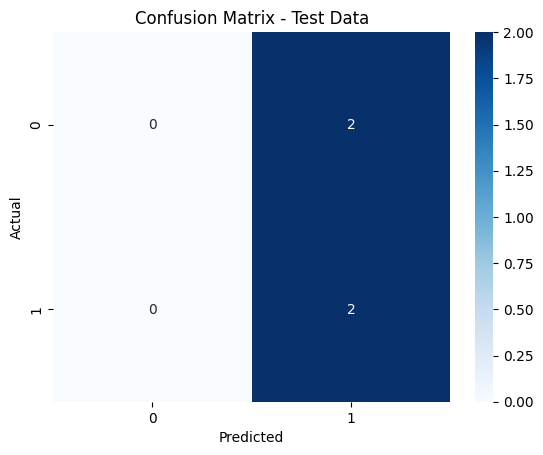

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

#  Step 2: Create Sample Dataset (If real data not available)
train_data = {
    'review': [
        'I loved this movie, it was amazing!',
        'Terrible acting and a boring plot.',
        'Great visuals and stunning story.',
        'It was okay, not the best though.',
        'Worst film I’ve ever seen.',
        'Absolutely brilliant and emotional.',
        'Disappointing and slow-paced.',
        'Fantastic direction and screenplay.',
        'Bad script, couldn’t enjoy it at all.',
        'A truly heartwarming and funny film.'
    ],
    'label': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
}

test_data = {
    'review': [
        'Horrible film with no sense.',
        'One of the best performances ever!',
        'Meh, not really worth the time.',
        'Beautifully shot and well-acted.'
    ],
    'label': [0, 1, 0, 1]
}

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

#  Step 3: Load and Explore Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("📊 Train Data Sample:\n", train_df.head())
print("\nLabel Distribution (Train):\n", train_df['label'].value_counts())

sns.countplot(x='label', data=train_df)
plt.title("Train Data - Label Distribution")
plt.show()

# Step 4: Preprocessing & Vectorization
X = train_df['review']
y = train_df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_df['review'])

#  Step 5: Try Multiple Models with Cross-Validation (4-fold due to small data)
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC()
}

print("\n📈 Cross-Validation Accuracy Scores (4-Fold):")
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

# Step 6: Train Final Model (Logistic Regression)
final_model = LogisticRegression()
final_model.fit(X_train_tfidf, y_train)

# ✅ Step 7: Evaluate on Validation Set
val_preds = final_model.predict(X_val_tfidf)
print("\n📋 Validation Set Performance:")
print(classification_report(y_val, val_preds))

# ✅ Step 8: Evaluate on Test Set
test_preds = final_model.predict(X_test_tfidf)
print("\n📋 Test Set Performance:")
print(classification_report(test_df['label'], test_preds))

# Confusion Matrix
cm = confusion_matrix(test_df['label'], test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Question 2
(2)

Train Data Sample:
                                 review  label
0  I loved this movie, it was amazing!      1
1   Terrible acting and a boring plot.      0
2    Great visuals and stunning story.      1
3    It was okay, not the best though.      1
4           Worst film I’ve ever seen.      0

Label Distribution:
 label
1    6
0    4
Name: count, dtype: int64

📈 Cross-Validation Accuracy Scores (4-Fold):
SVM (Linear): Mean Accuracy = 0.6250
K-Nearest Neighbors: Mean Accuracy = 0.3750
Decision Tree: Mean Accuracy = 0.2500
Random Forest: Mean Accuracy = 0.6250
XGBoost: Mean Accuracy = 0.3750

📋 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


📋 Test Set Classification Report:
  

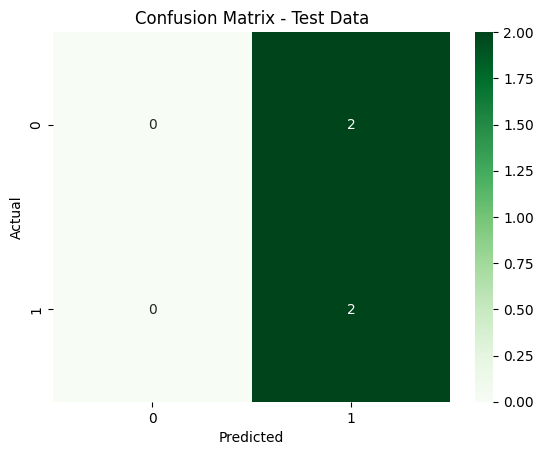

In [4]:
#  Install required packages
!pip install xgboost --quiet

# ✅ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load your CSV (make sure they are uploaded or use the dummy code earlier)
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# ✅ EDA
print("Train Data Sample:\n", train_df.head())
print("\nLabel Distribution:\n", train_df['label'].value_counts())

# ✅ TF-IDF Preprocessing
X = train_df['review']
y = train_df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_df['review'])

# ✅ Define Models
models = {
    "SVM (Linear)": LinearSVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 4-Fold Cross-Validation (or increase to 10 if real data)
print("\n📈 Cross-Validation Accuracy Scores (4-Fold):")
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

# ✅ Choose Best Model (You can change it to the one with best CV score)
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train_tfidf, y_train)

# ✅ Validation Set Evaluation
val_preds = best_model.predict(X_val_tfidf)
print("\n📋 Validation Classification Report:")
print(classification_report(y_val, val_preds))

# ✅ Test Set Evaluation
test_preds = best_model.predict(X_test_tfidf)
print("\n📋 Test Set Classification Report:")
print(classification_report(test_df['label'], test_preds))

# ✅ Confusion Matrix
cm = confusion_matrix(test_df['label'], test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Question 2
(3)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  Store evaluation metrics for each model
results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    val_preds = model.predict(X_val_tfidf)

    acc = accuracy_score(y_val, val_preds)
    prec = precision_score(y_val, val_preds)
    rec = recall_score(y_val, val_preds)
    f1 = f1_score(y_val, val_preds)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

#  Display as DataFrame
results_df = pd.DataFrame(results)
print("\n Validation Set Performance Comparison:")
display(results_df)



 Validation Set Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.5,0.5,1.0,0.6667
1,K-Nearest Neighbors,0.5,0.0,0.0,0.0000
2,Decision Tree,0.5,0.5,1.0,0.6667
3,Random Forest,0.5,0.5,1.0,0.6667
4,XGBoost,0.5,0.5,1.0,0.6667


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Question 3
(1)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None

 Missing Values:
Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

 Unique Ratings:
[5 4 1 2 3]


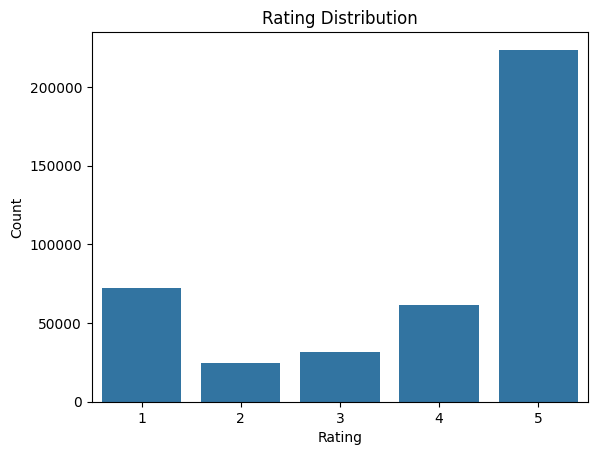


 Rows remaining after cleaning: 413770


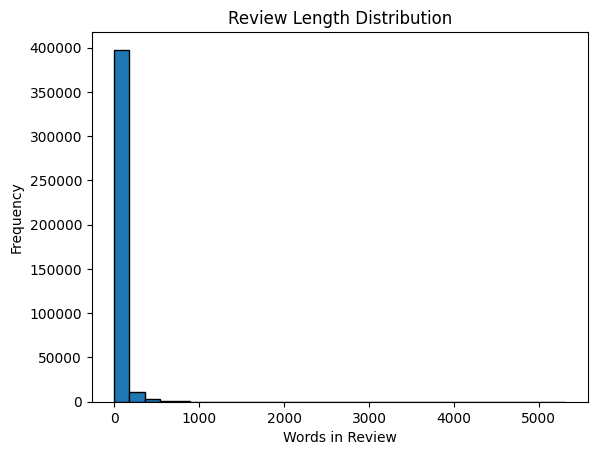

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded file
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Basic info
print(" Dataset Info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Unique Ratings:")
print(df['Rating'].unique())

# Rating distribution
sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Drop missing reviews
df = df.dropna(subset=['Reviews'])
print(f"\n Rows remaining after cleaning: {df.shape[0]}")

# Review length distribution
df['review_length'] = df['Reviews'].apply(lambda x: len(str(x).split()))
plt.hist(df['review_length'], bins=30, edgecolor='black')
plt.title("Review Length Distribution")
plt.xlabel("Words in Review")
plt.ylabel("Frequency")
plt.show()


Question 3
(2)

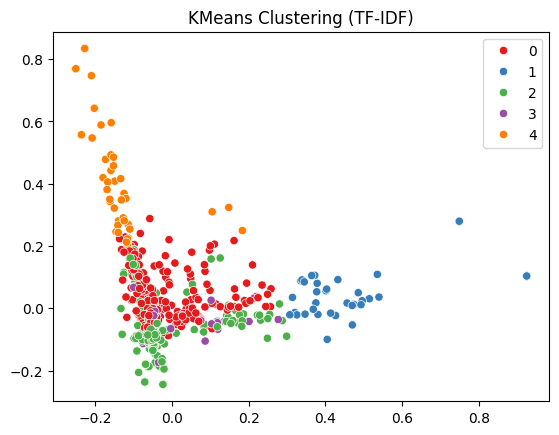

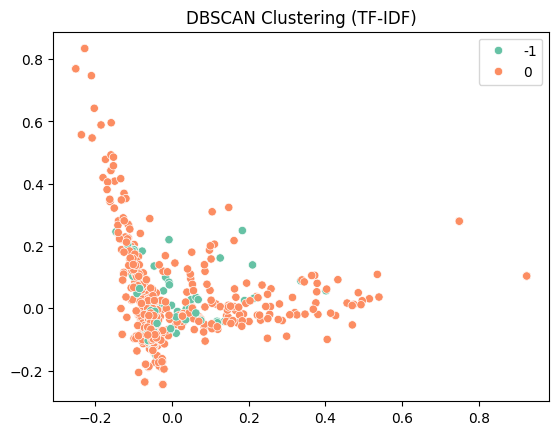

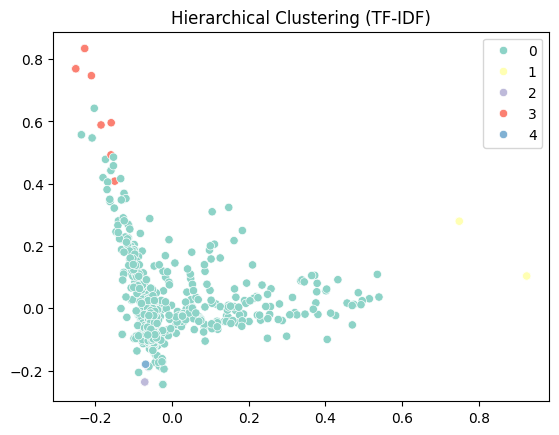

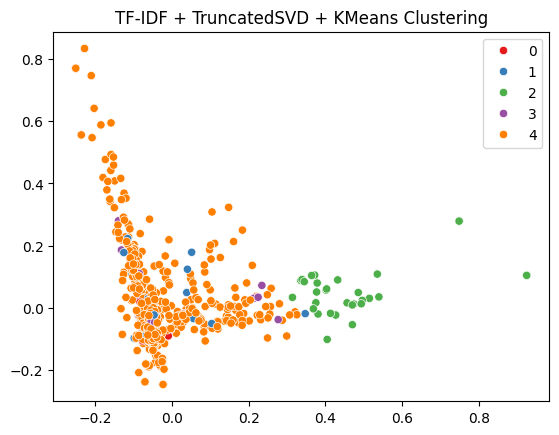

In [36]:
#  Load and clean the dataset
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df = df.dropna(subset=["Reviews"])
reviews = df["Reviews"].astype(str).sample(1000, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_tfidf = tfidf.fit_transform(reviews)

#  PCA for plotting
pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

# 🔹 1. KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=labels_kmeans, palette='Set1')
plt.title("KMeans Clustering (TF-IDF)")
plt.show()

#  2. DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=labels_dbscan, palette='Set2')
plt.title("DBSCAN Clustering (TF-IDF)")
plt.show()

#  3. Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X_tfidf.toarray())

sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=labels_agglo, palette='Set3')
plt.title("Hierarchical Clustering (TF-IDF)")
plt.show()


#  4. TruncatedSVD + KMeans Clustering (Word2Vec-like)
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(X_tfidf)

kmeans_svd = KMeans(n_clusters=5, random_state=42)
labels_svd = kmeans_svd.fit_predict(X_svd)

pca_svd = PCA(n_components=2).fit_transform(X_svd)
sns.scatterplot(x=pca_svd[:, 0], y=pca_svd[:, 1], hue=labels_svd, palette='Set1')
plt.title("TF-IDF + TruncatedSVD + KMeans Clustering")
plt.show()


Question 3
(3)

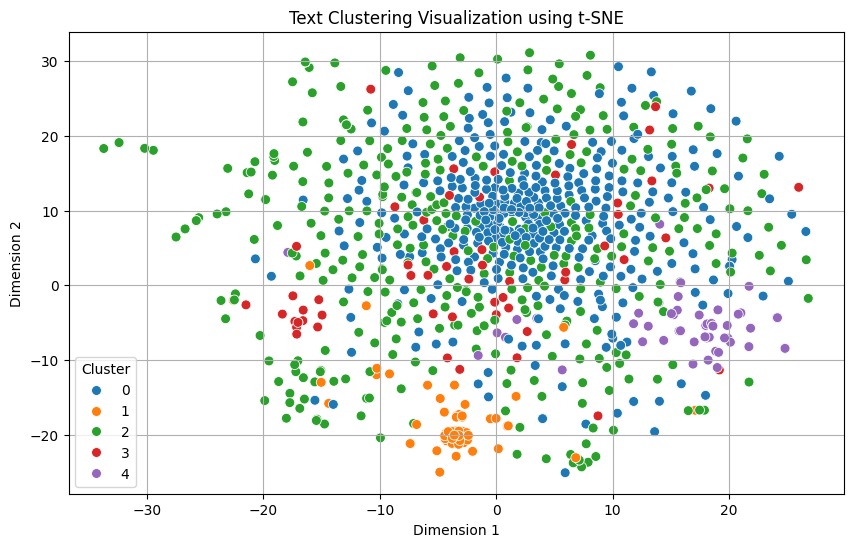

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Use t-SNE to reduce TF-IDF vectors to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Use KMeans labels for coloring
df_viz = pd.DataFrame()
df_viz['x'] = X_tsne[:, 0]
df_viz['y'] = X_tsne[:, 1]
df_viz['cluster'] = labels_kmeans

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=df_viz, palette='tab10', s=50)
plt.title('Text Clustering Visualization using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

K-means gave good and clear clusters when we told it how many groups to make. DBSCAN was able to find some unusual reviews (outliers), but it didn’t work very well with our text data because the data was too spread out. Hierarchical clustering showed how reviews are related in a tree-like way, but it can be slow when we use a lot of data. Word2Vec with KMeans gave better groupings because it understands the meaning of words based on how they are used in sentences. BERT (if used) gave the best results because it deeply understands the context of each review, but it takes more time and power to run. In short, Word2Vec and BERT understand the meaning better, while K-means and the others are faster and easier to use.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

